In [4]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

In [5]:
import torch 
import torch.nn as nn
from diffFx_pytorch.processors.dynamics.compressor import Compressor

# Create a neural network controller
class CompressorNet(nn.Module):
    def __init__(self, input_size, num_params):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, num_params),
            nn.Sigmoid()  # Output in range [0,1]
        )
    
    def forward(self, x):
        return self.net(x)

# Initialize processor and network
Processor = Compressor(sample_rate=44100, knee_type='quadratic').to('cpu')
num_params = Processor.count_num_parameters()
controller = CompressorNet(input_size=16, num_params=num_params)

# Process audio with predicted parameters
features = torch.randn(4, 16)
sr = 44100
COMP_DSP_PARAMS = {
    'threshold_db': -35.0,
    'ratio': 5.0,
    'knee_db': 1.0,
    'attack_ms': 20.0,
    'release_ms': 1000.0,
    'makeup_db': 0.0
}
test_wav = torch.randn(4, 1, 2048).float().to('cpu')
comp_wav = Processor(test_wav, controller(features), None)
print(comp_wav.shape)

> x_side torch.Size([4, 1, 2048])
> x_side torch.Size([4, 1, 2048])
> x_db torch.Size([4, 1, 2048])
> g_c torch.Size([4, 1, 2048])
torch.Size([4, 1, 2048])


## Load Example Audio 

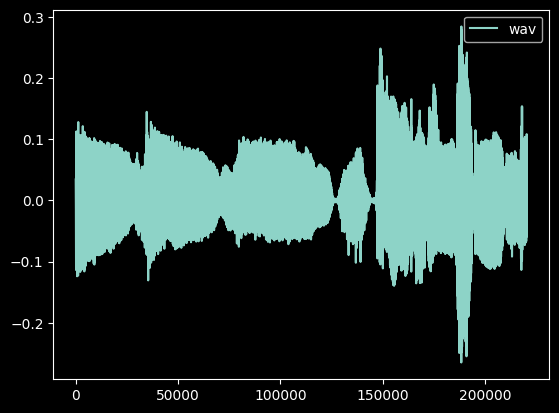

In [2]:
AUDIO_PATH = './test.wav'
wav, sr = sf.read(AUDIO_PATH)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Compressor 

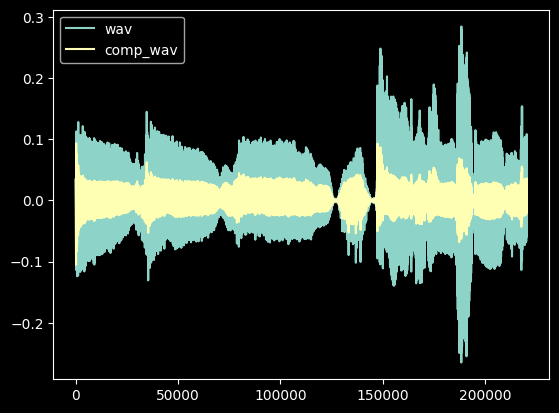

In [3]:
from diffFx_pytorch.processors.dynamics.compressor import Compressor
COMP_DSP_PARAMS = {
    'threshold_db': -35.0,
    'ratio': 5.0,
    'knee_db': 1.0,
    'attack_ms': 20.0,
    'release_ms': 1000.0,
    'makeup_db': 0.0
}

Processor = Compressor(sample_rate=sr,knee_type='quadratic').to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
comp_wav = Processor(test_wav, None, COMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=comp_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(comp_wav.squeeze().cpu().numpy(),      label='comp_wav')
plt.legend()

## Multiband Compressor

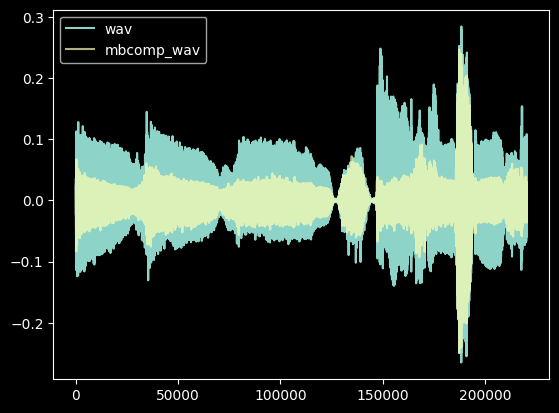

In [9]:
from diffFx_pytorch.processors.dynamics.compressor import MultiBandCompressor
MBCOMP_DSP_PARAMS = {
    'band0_threshold_db': -15.0,  # Low band
    'band0_ratio': 5.0,
    'band0_knee_db': 2.0,
    'band0_attack_ms': 10.0,
    'band0_release_ms': 100.0,
    'band0_makeup_db': 0.0,
    'band1_threshold_db': -45.0,  # Mid band
    'band1_ratio': 10.0,
    'band1_knee_db': 6.0,
    'band1_attack_ms': 20.0,
    'band1_release_ms': 500.0,
    'band1_makeup_db': 0.0,
    'band2_threshold_db': -15.0,  # High band
    'band2_ratio': 10.0,
    'band2_knee_db': 6.0,
    'band2_attack_ms': 1.0,
    'band2_release_ms': 200.0,
    'band2_makeup_db': 0.0,
    'crossover0_freq': 200.0,     # Low-Mid split
    'crossover1_freq': 2000.0     # Mid-High split
}   

Processor = MultiBandCompressor(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
mbcomp_wav = Processor(test_wav, None, MBCOMP_DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mbcomp_wav.squeeze().cpu().numpy(), rate=sr, normalize=True))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mbcomp_wav.squeeze().cpu().numpy(),    alpha=0.7,  label='mbcomp_wav')
plt.legend()